## <font color='Purple'><b>Assignment</font></b>

<font color='red'><b>Task:</font></b> The given dataset contains details about organic chemical compounds including their chemical features, isomeric conformation, names and the classes in which they are classified. The compounds are classified as either ‘Musk’ or ‘Non-Musk’ compounds. Our task is to build a classification model on the given data using any Deep Learning approach  viz. Multi-Layer Perceptron, CNN, RNN, etc.

### Loading libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score
%matplotlib inline

### Loading data using pandas dataframe

In [2]:
df=pd.read_csv('musk_csv.csv')
df.head(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


### Exploratory Data Analysis

In [14]:
# No. of datapoints
df.shape[0]

6598

In [15]:
# No. of features
df.shape[1]

170

In [16]:
# values in class varible
df['class'].values

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
# no. of datapoints in each class 0 and 1.
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [9]:
df.tail(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [25]:
# missing value analysis
df.isnull().sum() 

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
f10                  0
f11                  0
f12                  0
f13                  0
f14                  0
f15                  0
f16                  0
f17                  0
f18                  0
f19                  0
f20                  0
f21                  0
f22                  0
f23                  0
f24                  0
f25                  0
f26                  0
f27                  0
                    ..
f138                 0
f139                 0
f140                 0
f141                 0
f142                 0
f143                 0
f144                 0
f145                 0
f146                 0
f147                 0
f148                 0
f149                 0
f150       

### Observation:-
- This is an imbalanced dataset.
- This is a binary classification problem where class 1 means MUSK compound and class 0 mean NON-MUSK compound.
- No missing value is present in the dataset.

## Preprocessing

In [3]:
# Correlation analysis
# Create correlation matrix
corr_matrix = df.corr().abs()

In [4]:
# dropping columns having very high correlation
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.92
to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]

In [5]:
type(to_drop)

list

In [6]:
df = df.drop(to_drop,axis=1)

In [7]:
# After drop size of dataframe
df.shape

(6598, 117)

## Split data into train and test in the 80:20 ratio

In [8]:
train,test = train_test_split(df, random_state=30, test_size = 0.2)

In [9]:
train.shape

(5278, 117)

In [10]:
Xtrain = train.iloc[:,3:-1]
Xtrain.shape

(5278, 113)

In [11]:
Xtrain.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165',
       'f166'],
      dtype='object', length=113)

In [12]:
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]

In [13]:
Ytest.shape

(1320, 1)

In [15]:
x=[1]*Xtrain.shape[0]
Xtrain["demo"]=x
y=[1]*Xtest.shape[0]
Xtest["demo"]=y

In [16]:
Xtrain.shape

(5278, 114)

In [17]:
Xtest.shape

(1320, 114)

## Model

## CNN

In [14]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [32]:
x_train=Xtrain.values.reshape(Xtrain.shape[0],19,6,1)
x_test=Xtest.values.reshape(Xtest.shape[0],19,6,1)

In [33]:
x_train.shape

(5278, 19, 6, 1)

In [34]:
x_test.shape

(1320, 19, 6, 1)

In [47]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [49]:
history = model.fit(x_train,Ytrain,batch_size=128,epochs=30,validation_data=(x_test,Ytest))
score=model.evaluate(x_test,Ytest,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/30
5278/5278 [==============================] - 1s 204us/step - loss: 2.7909 - acc: 0.8194 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 2/30
5278/5278 [==============================] - 1s 124us/step - loss: 2.5139 - acc: 0.8433 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 3/30
5278/5278 [==============================] - 1s 141us/step - loss: 2.4717 - acc: 0.8441 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 4/30
5278/5278 [==============================] - 1s 126us/step - loss: 2.3921 - acc: 0.8401 - val_loss: 2.3567 - val_acc: 0.8538
Epoch 5/30
5278/5278 [==============================] - 1s 125us/step - loss: 1.4038 - acc: 0.8748 - val_loss: 0.7855 - val_acc: 0.9030
Epoch 6/30
5278/5278 [==============================] - 1s 128us/step - loss: 0.3905 - acc: 0.8962 - val_loss: 0.1481 - val_acc: 0.9455
Epoch 7/30
5278/5278 [==============================] - 1s 127us/step - loss: 0.2441 - acc: 0.9168 - val_loss: 0.1345 - val_acc: 0.9424


In [54]:
score1=model.evaluate(x_train,Ytrain,verbose=0)


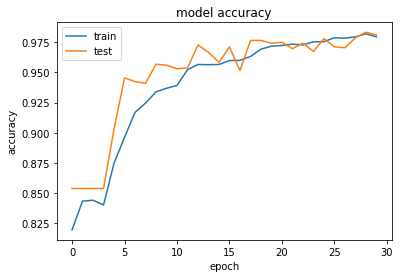

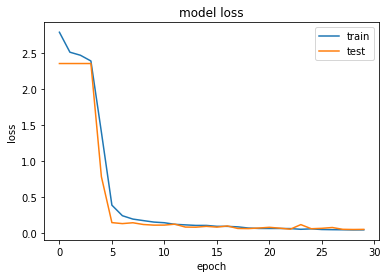

In [51]:
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [52]:
print("f1_score:",f1_score(Ytest,model.predict_classes(x_test),))
print("recall:",recall_score(Ytest,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9326145552560648
recall: 0.8963730569948186
Validation Loss: 0.05440216589380394
Validation Accuracy: 0.9810606060606061


In [55]:
print("Train f1_score:",f1_score(Ytrain,model.predict_classes(x_train),))
print("Train recall:",recall_score(Ytrain,model.predict_classes(x_train),))
print("Train Validation Loss:",score1[0])
print("Train Validation Accuracy:",score1[1])

Train f1_score: 0.9669369931378664
Train recall: 0.9405339805825242
Train Validation Loss: 0.02519449042680406
Train Validation Accuracy: 0.9899583175445245


In [53]:
model.save('model.h5')

In [4]:
from prettytable import PrettyTable
x=PrettyTable()
sn=[1,2,3,4]
mea=["f1_score","recall","loss","accuracy"]
train=[0.97,0.94,0.025,0.99]
test=[0.93,0.90,0.05,0.98]
x.add_column("S.No.",sn)
x.add_column("Metric",mea)
x.add_column("Train",train)
x.add_column("Test",test)

print(x)



+-------+----------+-------+------+
| S.No. |  Metric  | Train | Test |
+-------+----------+-------+------+
|   1   | f1_score |  0.97 | 0.93 |
|   2   |  recall  |  0.94 | 0.9  |
|   3   |   loss   | 0.025 | 0.05 |
|   4   | accuracy |  0.99 | 0.98 |
+-------+----------+-------+------+
